# KNN (K Nearest Neighbors)

### What is KNN

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use a data and classify new data points based on a similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.

For example, Imagine you had a graph, and two clusters of points. You categorized each cluster as category 1 and 2. Now if you introduce a new point inbetween those graphs, would you classify it as category 1 or 2? A natural answer is saying, whichever group it is closest to, and that is exactly what K-NN does. It takes a datapoint and compares it to other datapoints around it to see which group it is more "Similar" to, or whichever group has the most correlating fields with the point. Here is a brief article to provide more in depth learning. (`https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/`)

### How does it choose how to categorize?
Step 1: The KNN algorithim needs to know the number of neighbors

Step 2: It will take the nearest neighbors(The number you specifiy in step one) of that data point according to their Euclidian Distance(In mathematics, the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space. ).

Step 3: Among the neighbors, count the number of data points in each category.

Step 4: assign the new data point to the category where you counted the most neighbors.



# Step One: Preprocess the Data

As always with our we need to import our libraries, preprocess our data, and scale our features so they can be interpreted by the machine, as well as split our data so we have a testing set as well as a training set.

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\tBridges\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step Two: Fitting the training set

To fit the dataset to the KNN algorithim we will be using `KNeighborsClassifier` from `sklearn.neighbors`.

`KNeighborsClassifier` is simply a classifier implementing the k-nearest neighbors vote. We will be giving it 3 parameters.

n_neighbors: Defines the number of neighbors which the algorithim will base the classification on.

Metric: the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

p: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 


In [7]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


## Step Three: Predicting the results

In This step we will be predicting our results and using a confusion matrix to assess the accuracy of those results.



In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_test);
print(y_pred);

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
[[64  4]
 [ 3 29]]


Although in a notebook the results are a little confusing to see, the first array is the actual data points and the second array is the predictions made by the machine. If you want yo ucan go through each one and see what matches up but our confusion matric also does that for us. 

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the ads data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. 

So as you can see by the off diagonal(can also thing of right to left diagonal) we had 7 mispredicted points out of 103.

## Step Four: Visualising the Training set

Below we will visualise the dataset.


In [14]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


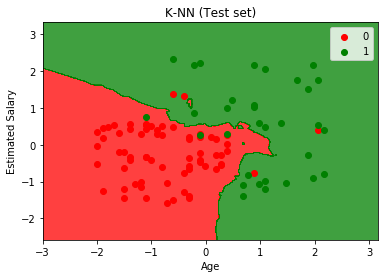

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()